Text(0, 0.5, 'CO2 concentration  %')

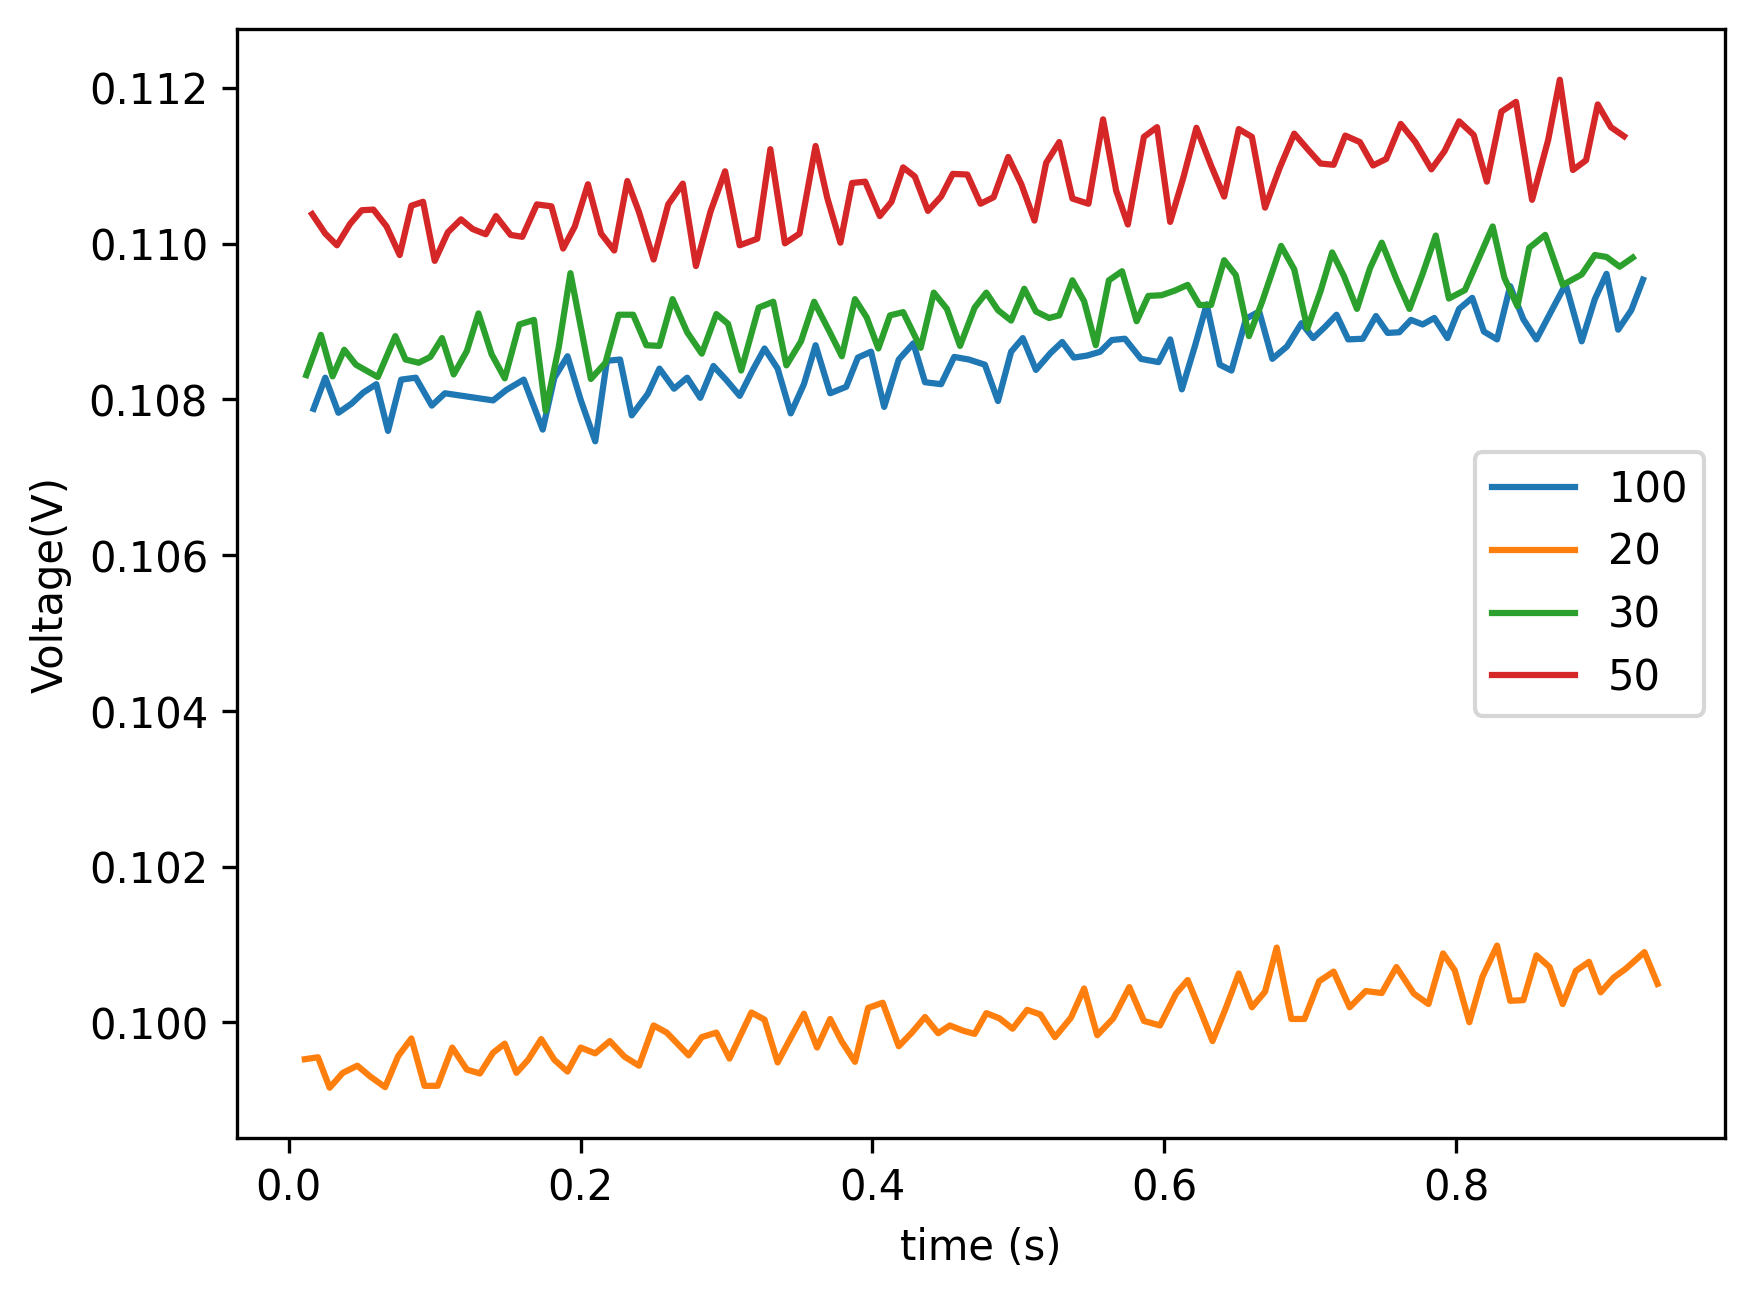

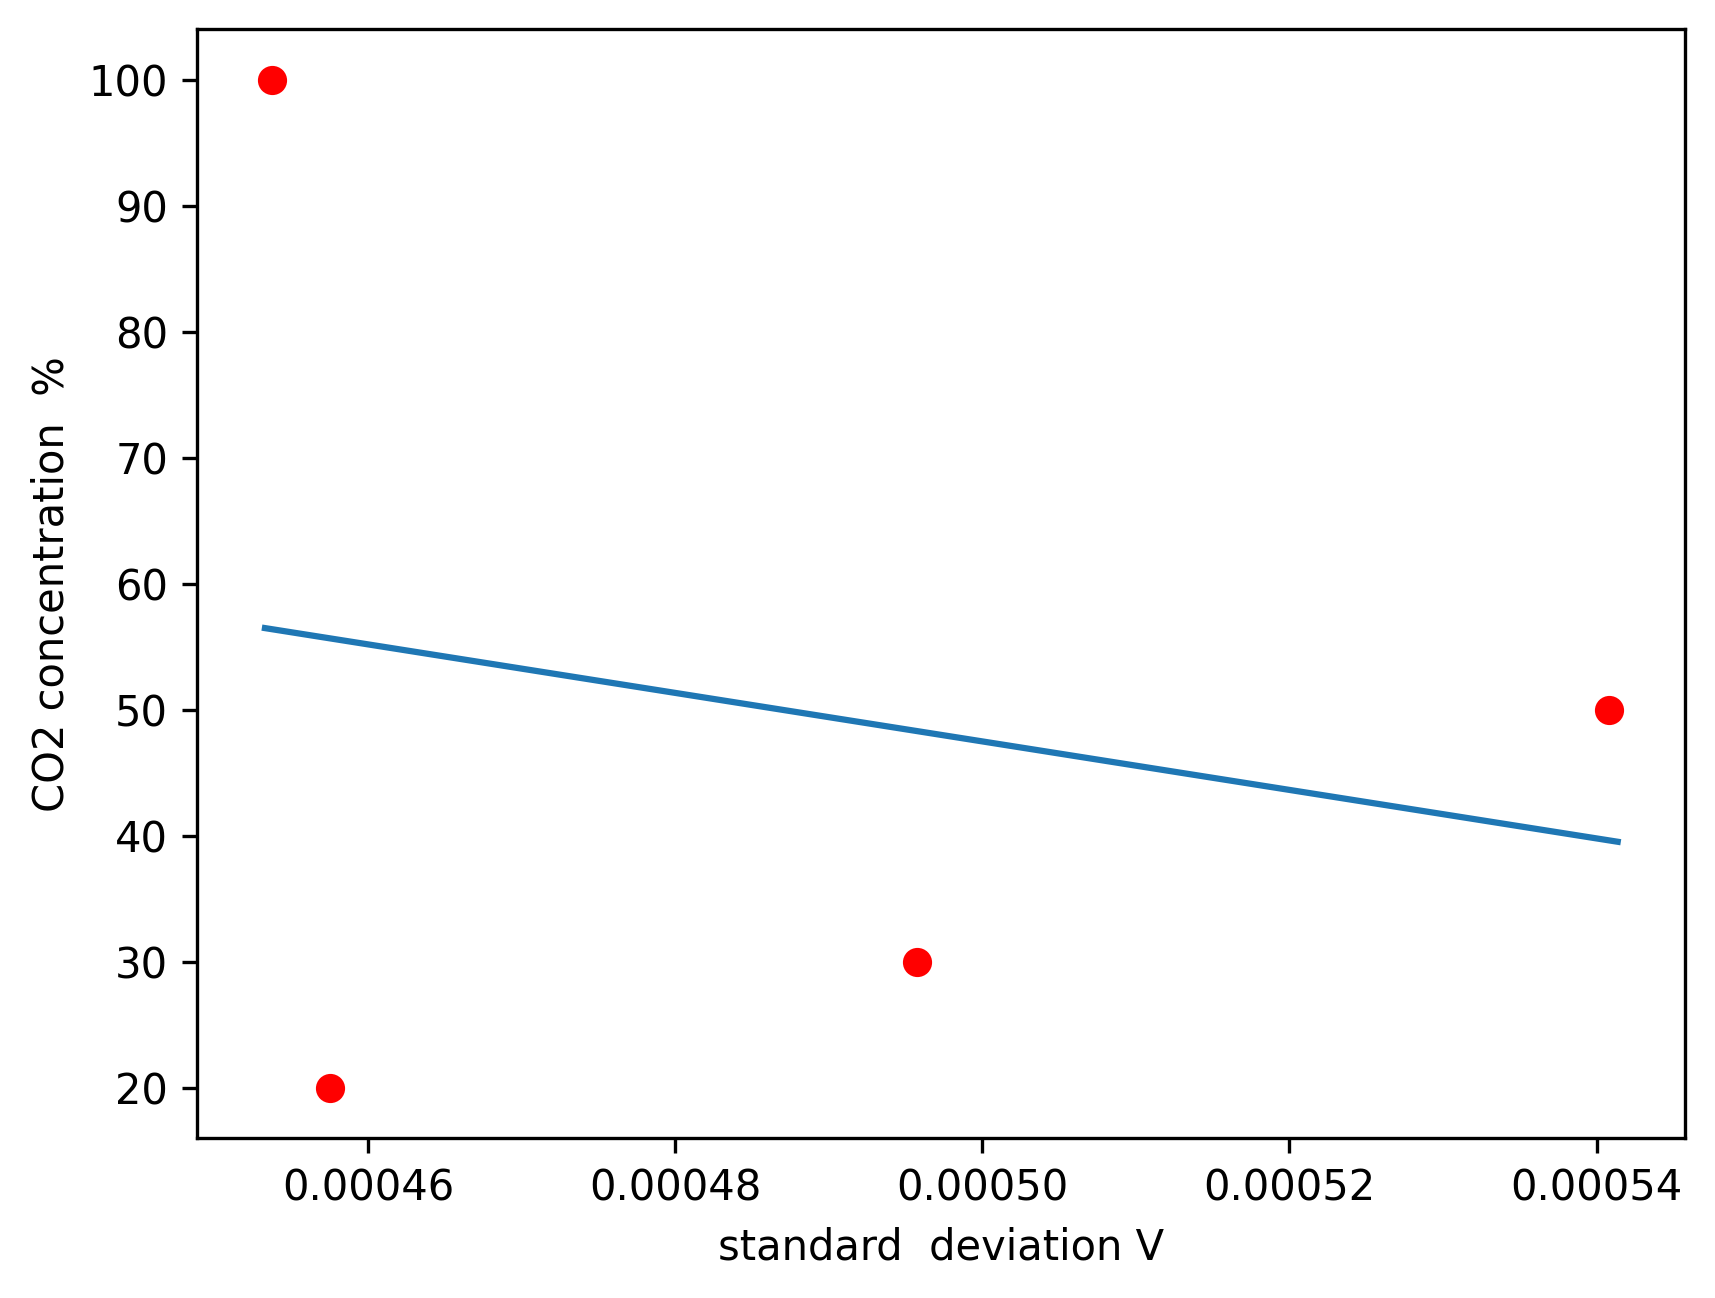

In [1]:
#Showing the linear regression
import os
import pickle as pkl
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

cwd  = os.getcwd()
data_dir =   cwd+'\\training\\'


# function to convert to superscript
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

l = []
c = []
corr_min = []
for root, dirs, files in os.walk(data_dir):
    for names in files:
        l.append(names)
plt.figure(dpi = 300)        
for file  in l:
    with open(data_dir+file, 'rb') as f:
        fetch = pkl.load(f)
        x = fetch[0]
        y = fetch[1]
        plt.plot(x,y)
        std = fetch[2]
        c.append(fetch[3])
        corr_min.append(std)

plt.xlabel("time (s)")       
plt.ylabel("Voltage(V)") 
plt.legend(c)        
corr_min = np.array(corr_min)
c = np.array(c)  
m1 = linregress(corr_min,c)
lin_model = lambda x: m1.intercept+x*m1.slope  
dip = np.linspace(min(corr_min)*.999,max(corr_min)*1.001,100)
conc = np.vectorize(lin_model)(dip)

plt.figure(dpi=300)
plt.plot(dip,conc)
plt.scatter(corr_min,c,c="r")
plt.xlabel(f"standard  deviation V")
plt.ylabel("CO2 concentration  %")

Text(0, 0.5, 'CO2 concentration  %')

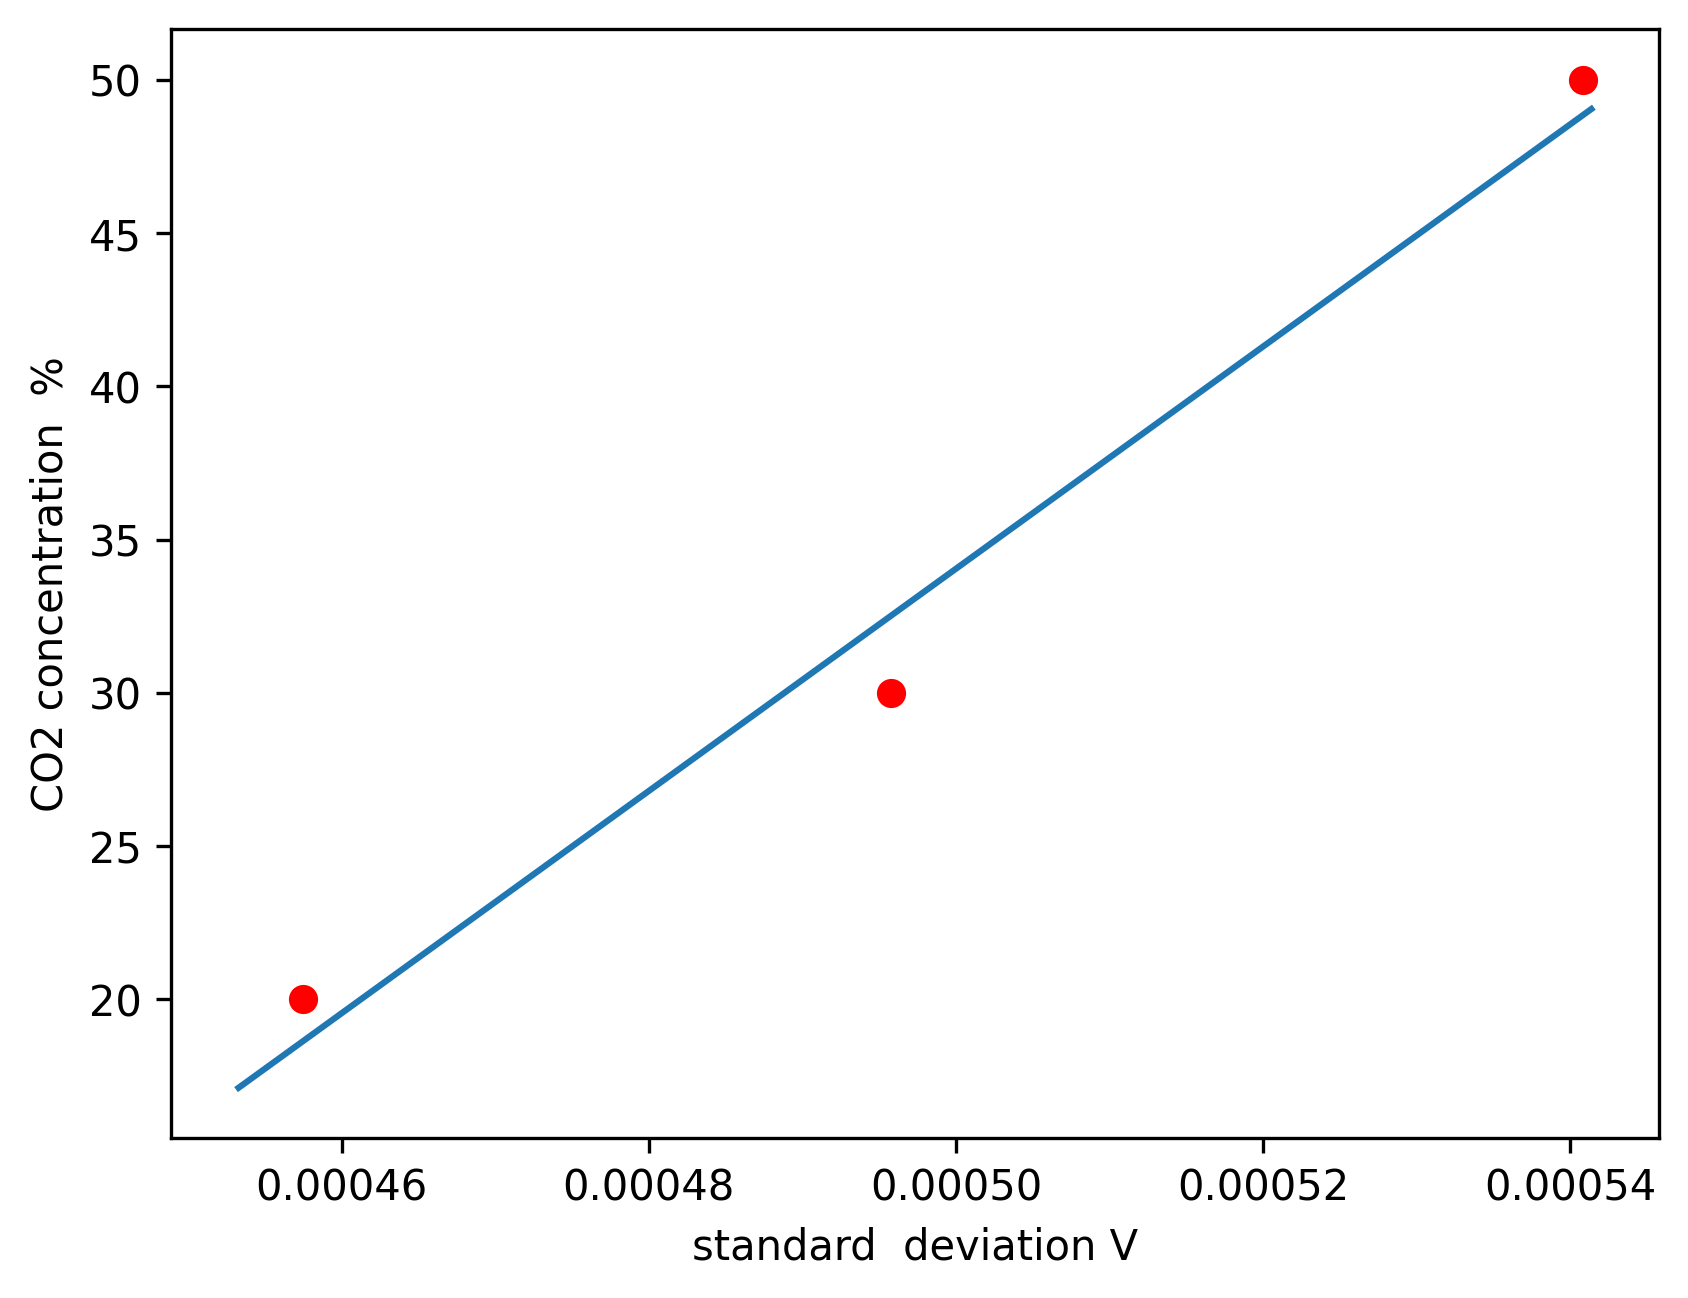

In [2]:
m1 = linregress(corr_min[1:],c[1:])
lin_model = lambda x: m1.intercept+x*m1.slope  
dip = np.linspace(min(corr_min)*.999,max(corr_min)*1.001,100)
conc = np.vectorize(lin_model)(dip)
plt.figure(dpi=300)
plt.plot(dip,conc)
plt.scatter(corr_min[1:],c[1:],c="r")
plt.xlabel(f"standard  deviation V")
plt.ylabel("CO2 concentration  %")